In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torch_nn import TorchNN  # 确保TorchNN模型已定义

In [3]:
# 检测GPU可用性
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda



Training with Adam optimizer...
Epoch 1/100 Loss: 3.4968
Epoch 2/100 Loss: 3.0991
Epoch 3/100 Loss: 2.7988
Epoch 4/100 Loss: 2.5435
Epoch 5/100 Loss: 2.3044
Epoch 6/100 Loss: 2.0885
Epoch 7/100 Loss: 1.8142
Epoch 8/100 Loss: 1.6300
Epoch 9/100 Loss: 1.5118
Epoch 10/100 Loss: 1.3271
Epoch 11/100 Loss: 1.2332
Epoch 12/100 Loss: 1.0601
Epoch 13/100 Loss: 0.8914
Epoch 14/100 Loss: 0.7916
Epoch 15/100 Loss: 0.7258
Epoch 16/100 Loss: 0.6272
Epoch 17/100 Loss: 0.5747
Epoch 18/100 Loss: 0.5013
Epoch 19/100 Loss: 0.4785
Epoch 20/100 Loss: 0.4026
Epoch 21/100 Loss: 0.3736
Epoch 22/100 Loss: 0.3841
Epoch 23/100 Loss: 0.2965
Epoch 24/100 Loss: 0.3224
Epoch 25/100 Loss: 0.2842
Epoch 26/100 Loss: 0.3270
Epoch 27/100 Loss: 0.2808
Epoch 28/100 Loss: 0.2655
Epoch 29/100 Loss: 0.2569
Epoch 30/100 Loss: 0.2056
Epoch 31/100 Loss: 0.2525
Epoch 32/100 Loss: 0.2073
Epoch 33/100 Loss: 0.1666
Epoch 34/100 Loss: 0.1775
Epoch 35/100 Loss: 0.1641
Epoch 36/100 Loss: 0.1963
Epoch 37/100 Loss: 0.1544
Epoch 38/100 L

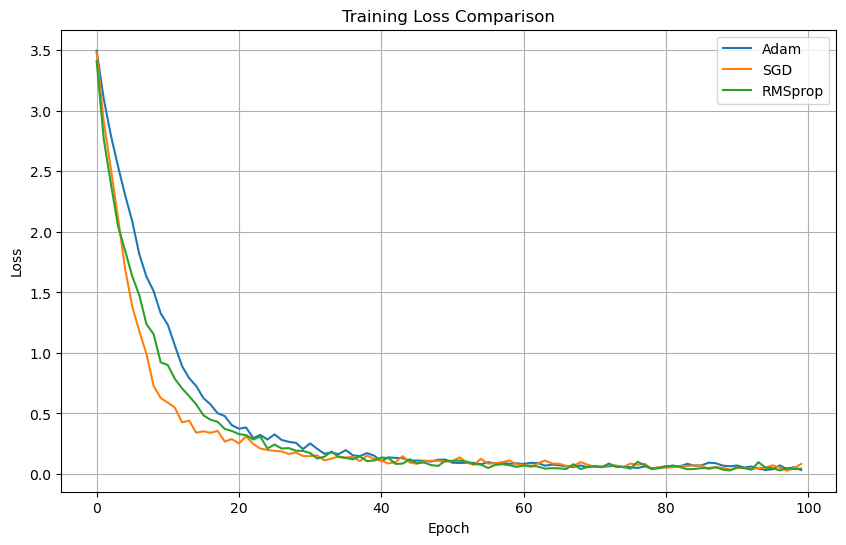

In [4]:
# 加载数据
data = fetch_olivetti_faces(data_home='./face_data', shuffle=True)
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 转换为Tensor
X_train = torch.FloatTensor(X_train).to(device)
X_test = torch.FloatTensor(X_test).to(device)
y_train = torch.LongTensor(y_train).to(device)
y_test = torch.LongTensor(y_test).to(device)

# 创建数据加载器
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=16, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=16, shuffle=True)

# 优化器配置
optimizer_configs = {
    "Adam": {"lr": 0.001},
    "SGD": {"lr": 0.01, "momentum": 0.9},
    "RMSprop": {"lr": 0.001}
}

loss_fn = nn.CrossEntropyLoss()
epochs = 100

# 存储所有优化器的训练损失
train_losses_dict = {}

# 对每个优化器进行训练
for optimizer_name in optimizer_configs:
    # 初始化新的模型和优化器
    model = TorchNN().to(device)
    config = optimizer_configs[optimizer_name]
    if optimizer_name == "Adam":
        optimizer = optim.Adam(model.parameters(), **config)
    elif optimizer_name == "SGD":
        optimizer = optim.SGD(model.parameters(), **config)
    elif optimizer_name == "RMSprop":
        optimizer = optim.RMSprop(model.parameters(), **config)
    else:
        continue
    print(f"\nTraining with {optimizer_name} optimizer...")
    train_losses = []
    # 训练循环
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0.0
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = loss_fn(output, target)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f"Epoch {epoch + 1}/{epochs} Loss: {avg_loss:.4f}")

    # 存储当前优化器的损失记录
    train_losses_dict[optimizer_name] = train_losses

# 在同一图中绘制所有损失曲线
plt.figure(figsize=(10, 6))
for optimizer_name, losses in train_losses_dict.items():
    plt.plot(losses, label=f'{optimizer_name}')

plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
